# Sheet 9 - k-Nearest Neighbors classifier 

We will be using the Titanic training and test data from [Kaggle](https://www.kaggle.com/c/titanic).


Next import the necessary libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading and cleaning the data

Read the CSV file `train.csv` into the dataframe `train`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Data Science')

from google.colab import drive
drive.mount('/content/drive')

Display your `train` dataframe below to check it was created properly.

In [ ]:
train=pd.read_csv("train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


For reference, let's get the summaries of all quantitative columns:

In [ ]:
train.loc[:,["PassengerId","Age","SibSp","Parch","Fare"]].describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


And the summaries of all qualitative columns:

In [ ]:
train[["Name","Pclass","Sex","Ticket","Cabin","Embarked"]].astype("category").describe()

,Name,Pclass,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,891,3,2,681,147,3
top,"van Melkebeke, Mr. Philemon",3,male,CA. 2343,B96 B98,S
freq,1,491,577,7,4,644


We can see there is some missing data in the `Age`, `Cabin`, and `Embarked` columns.  With previous datasets, we have simply removed any rows with missing data.  Today we will take a different approach, and replace the missing `Age` and `Embarked` data with the most likely value.  We won't use the `Cabin` column in the classification, so we don't worry about the missing data in it.

First, let's replace any missing ages with the median age.  Compute the median age, and store it in the variable `median_age`.

In [ ]:
median_age=train["Age"].median()
median_age

28.0

To fill the NaN values in the `Age` column, type and run this code below: `train["Age"] = train["Age"].fillna(median_age)`

In [ ]:
train["Age"]=train["Age"].fillna(median_age)

To check this worked, display the quantitative column summaries again:

In [ ]:
train[["PassengerId","Age","SibSp","Parch","Fare"]].describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.361582,0.523008,0.381594,32.204208
std,257.353842,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Did the mean age change?  Did the median age change?  Does this make sense?

### First prediction

Let's use the quantitative columns of age, fare, SibSp, and Parch to make a prediction.

First we will make a data frame with only those columns.

In [ ]:
X=train[['Age','Fare','SibSp','Parch']]

Set the variable `y` to be the `Survived` column.

In [ ]:
y=train[['Survived']]

Now we will split our (training) data into a training and a test set.  We do this to be able to easily check our predications without using Kaggle (which takes some time).

In [ ]:
X_train,X_test,y_train, y_test =train_test_split(X,y)

Display the variables `X_train`, `X_test`, `y_train`, `y_test`.  What is stored in them?

In [ ]:
X_train.describe()

,Age,Fare,SibSp,Parch
count,668.000000,668.000000,668.000000,668.000000
mean,29.470808,32.526147,0.510479,0.371257
std,13.399073,51.976576,1.036751,0.789671
min,0.670000,0.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000
50%,28.000000,14.458300,0.000000,0.000000
75%,36.000000,31.275000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


In [ ]:
X_test.describe()

,Age,Fare,SibSp,Parch
count,223.000000,223.000000,223.000000,223.000000
mean,29.034395,31.239834,0.560538,0.412556
std,11.832985,42.212391,1.282124,0.854360
min,0.420000,0.000000,0.000000,0.000000
25%,23.000000,8.050000,0.000000,0.000000
50%,28.000000,14.400000,0.000000,0.000000
75%,33.500000,30.285400,1.000000,0.000000
max,70.000000,263.000000,8.000000,5.000000


In [ ]:
y_train.describe()

,Survived
count,668.000000
mean,0.392216
std,0.488610
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
y_test.describe()

,Survived
count,223.000000
mean,0.358744
std,0.480711
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Now we will create a variable to store information about our k-nearest neighbors classifier:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

How many neighbors is the classifier using?

Next we will *fit* our classifier using the training data.  This means the classifier stores the information about the coordinates of each training data point and whether it is a survivor in a way that will be make the next step easy to compute. 

In [ ]:
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

Finally, we will make a prediction about the testing data.

In [ ]:
y_pred = knn.predict(X_test)

Display `y_pred`.  Is it what you expected?

In [ ]:
pd.DataFrame(y_pred).astype('category').describe()


,0
count,223
unique,2
top,0
freq,152


Finally, let's compute the accuracy of our predictions.

In [ ]:
knn.score(X_test,y_test)

0.6457399103139013

How accurate was our model?  We can make it more accurate by adding the qualitative information about the passengers.

### Adding the qualitative column information

Next, we'll replace the missing value in the `Embarked` column with the mode of the column.  First compute and display the mode.

In [ ]:
mode_embarked=train['Embarked'].mode()[0]
mode_embarked

'S'

What's the mode?  How is it stored: as a string or as a Series?

Since the mode is stored as as a Series, the easiest way to replace the missing values is by directly using `"S"` as the parameter for `fillna()`.

Replace the missing values in the Embarked column with `S`:

In [ ]:
train["Embarked"]=train["Embarked"].fillna(mode_embarked)

Check that your code worked by displaying the summary of the qualitative columns:

In [ ]:
train[["Name","Pclass","Sex","Ticket","Cabin","Embarked"]].astype("category").describe()

,Name,Pclass,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,891
unique,891,3,2,681,147,3
top,"van Melkebeke, Mr. Philemon",3,male,CA. 2343,B96 B98,S
freq,1,491,577,7,4,646


### Optional:  Effect of Sex, Pclass, and Embarkedon survival

Let's look at the effect of Sex, Pclass, and Embarked on survival.  Create two new dataframes, one containing only survivors and one containing only people who perished.

In [ ]:
df_survivor=train.loc[train['Survived']==1]
df_perished=train.loc[train['Survived']==0]

Create a bar chart of sex of the survivors.

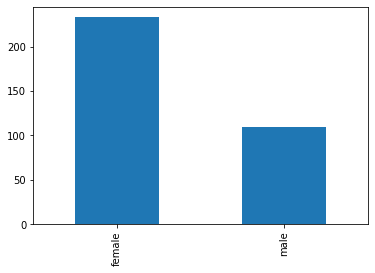

In [ ]:
df_survivor['Sex'].value_counts().plot(kind='bar')

Who was more likely to survive?

Now create a bar chart of the people who did not survive.

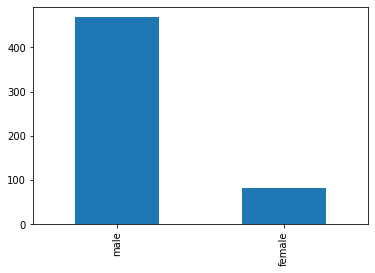

In [ ]:
df_perished['Sex'].value_counts().plot(kind='bar')

Who was more likely to not survive?

Let's look at passenger class (`Pclass`).  Create a bar chart of the passenger class of the survivors.

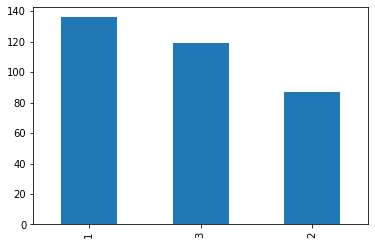

In [ ]:
df_survivor['Pclass'].value_counts().plot(kind='bar')

Which class of passengers was most likely to survive?

Now create a bar chart of the passenger class of the passengers who did not survive.

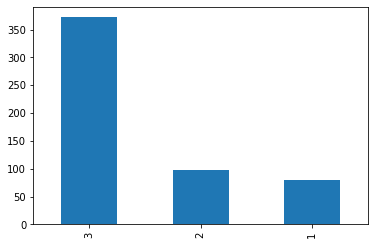

In [ ]:
df_perished['Pclass'].value_counts().plot(kind='bar')

Which class of passengers was most likely to not survive?

Finally, create a bar chart of the ports the surviving passengers embarked at and a bar chart of the ports the passengers who did not survive embarked at.

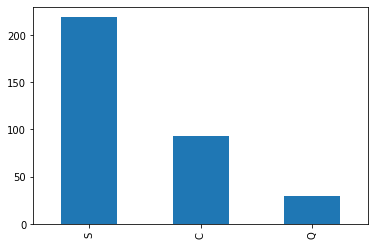

In [ ]:
df_survivor['Embarked'].value_counts().plot(kind='bar')

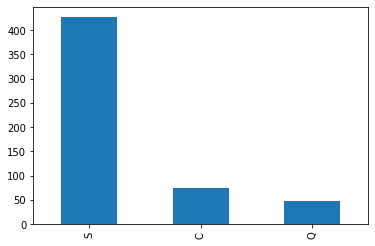

In [ ]:
df_perished['Embarked'].value_counts().plot(kind='bar')

Is there a difference in the distributions of embarkation ports for the surviving and non-surviving passengers?

### Creating dummy variables

The k-nearest neighbor classifier can only use quantitative data.  However, we saw that sex,  and passenger class (`Pclass`) played a large role in whether someone survived or not, and the port of embarkation also played a (less) role.  To use these qualitative columns, we can convert them into quantitative data using *dummy variables*.  A *dummy* or *indicator* variable is a variable that takes the value 0 or 1 depending on whether that data point is in some category.

Run the following code to create dummy variables for these columns and display the new dataframe:

# New Section

In [ ]:
train2 = pd.get_dummies(train, columns = ["Pclass","Sex","Embarked"], drop_first = True)
train2.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1,0,1


What happened?

Each of the qualitative columns was replaced by the one or two dummy variable columns.  For example, `Sex` was replaced by `Sex_male` which contains 1 if the passenger was male and 0 if the passenger was female.

Why is there no `Sex_female` column?

We are almost ready to do our classification.  We just need to drop all remaining qualitative columns.

In [ ]:
train2.drop("Cabin",axis = 1,inplace = True)
train2.drop("Name",axis = 1,inplace = True)
train2.drop("Ticket",axis = 1,inplace = True)

Here is another way to make our `X` dataframe:

In [ ]:
X2 = train2.drop("Survived",axis=1)
X2.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,0,1,1,0,1
1,2,38.0,1,0,71.2833,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,1,0,0,1
3,4,35.0,1,0,53.1000,0,0,0,0,1
4,5,35.0,0,0,8.0500,0,1,1,0,1


Next we split our data into training and test sets.  Use `X2` and `y` from above.

In [ ]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y)

Let's run the classifier.  First create it.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

Next fit the training data.

In [ ]:
knn.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

Next make a prediction about the test data.

In [ ]:
y_pred2 = knn.predict(X_test2)

Finally compute the accuracy of this model.

In [ ]:
knn.score(X_test2,y_test2)

0.6547085201793722

Did the accuracy improve?  What happens if you change the number of neighbors?

What happens if you use few columns?

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train3, X_test3, y_train3, y_test3 =train_test_split(X2,y,random_state=1,train_size=0.7)


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
log_model=LogisticRegression(tol=1e-11,C=1e9,solver='liblinear').fit(X_train3,y_train3)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predict_test=log_model.predict(X_test3)
predict_train=log_model.predict(X_train3)


In [ ]:
train_error=mean_squared_error(y_train3,predict_train)
train_error

0.18298555377207062

In [ ]:
test_error=mean_squared_error(y_test3,predict_test)
test_error

0.23134328358208955

In [ ]:
log_model.score(X_test3,y_test3)

0.7686567164179104

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train3, y_train3)

In [ ]:
clf.score(X_test3,y_test3)

0.7798507462686567

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB().fit(X_train3, y_train3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model.score(X_test3,y_test3)

0.6455223880597015